In [259]:
import sys, os
os.environ['NIXTLA_ID_AS_COL'] = '1'
sys.path.append('../../../aguacate-aljoan/')  # Adjust to the path where utils is located
from utils.data import obtener_nuevo_avocado, imputar_fechas

In [260]:
import pandas as pd

initial_avocado_df = imputar_fechas()
avocado_filtro = initial_avocado_df[initial_avocado_df['region_type'] == 'GreaterRegion']
avocado_filtro = avocado_filtro.sort_values(by=['Date', 'region']).reset_index(drop=True)
avocado_filtro['Date'] = pd.to_datetime(avocado_filtro['Date'])
avocado_filtro

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,region_type
0,51.0,2015-01-04,0.93,5777334.90,2843648.26,2267755.26,137479.64,528451.74,477193.38,47882.56,3375.80,conventional,2015.0,California,GreaterRegion
1,51.0,2015-01-04,1.24,142349.77,107490.73,25711.96,2.93,9144.15,9144.15,0.00,0.00,organic,2015.0,California,GreaterRegion
2,51.0,2015-01-04,1.02,3382800.12,467259.47,2059657.71,318102.38,537780.56,412779.64,111072.91,13928.01,conventional,2015.0,GreatLakes,GreaterRegion
3,51.0,2015-01-04,1.54,61615.10,3633.93,42963.06,0.00,15018.11,9763.55,5254.56,0.00,organic,2015.0,GreatLakes,GreaterRegion
4,51.0,2015-01-04,1.10,2578275.12,575245.44,1311502.53,181058.65,510468.50,429166.89,80986.81,314.80,conventional,2015.0,Midsouth,GreaterRegion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,0.0,2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,organic,2018.0,SouthCentral,GreaterRegion
2700,0.0,2018-03-25,1.23,4454904.40,2489234.81,333310.56,18460.82,1613898.21,1117431.16,484934.57,11532.48,conventional,2018.0,Southeast,GreaterRegion
2701,0.0,2018-03-25,1.45,121917.39,1929.39,18391.86,110.05,101486.09,85313.41,16172.68,0.00,organic,2018.0,Southeast,GreaterRegion
2702,0.0,2018-03-25,1.60,271723.08,26996.28,77861.39,117.56,166747.85,87108.00,79495.39,144.46,organic,2018.0,West,GreaterRegion


In [261]:
# Crear DataFrame para tipo 'organic'
organic_df = avocado_filtro[avocado_filtro['type'] == 'organic'].copy()
organic_df.rename(columns={'Date': 'ds'}, inplace=True)
organic_df['y'] = organic_df['Total Volume']
organic_df['unique_id'] = organic_df['type'] + '-' + organic_df['region']


# Crear DataFrame para tipo 'conventional'
conventional_df = avocado_filtro[avocado_filtro['type'] == 'conventional'].copy()
conventional_df.rename(columns={'Date': 'ds'}, inplace=True)
conventional_df['y'] = conventional_df['Total Volume']
conventional_df['unique_id'] = conventional_df['type'] + '-' + conventional_df['region']

In [262]:
conventional_df

,Unnamed: 0,ds,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,region_type,y,unique_id
0,51.0,2015-01-04,0.93,5777334.90,2843648.26,2267755.26,137479.64,528451.74,477193.38,47882.56,3375.80,conventional,2015.0,California,GreaterRegion,5777334.90,conventional-California
2,51.0,2015-01-04,1.02,3382800.12,467259.47,2059657.71,318102.38,537780.56,412779.64,111072.91,13928.01,conventional,2015.0,GreatLakes,GreaterRegion,3382800.12,conventional-GreatLakes
4,51.0,2015-01-04,1.10,2578275.12,575245.44,1311502.53,181058.65,510468.50,429166.89,80986.81,314.80,conventional,2015.0,Midsouth,GreaterRegion,2578275.12,conventional-Midsouth
6,51.0,2015-01-04,1.09,3759282.62,126640.65,2860709.93,7580.38,764351.66,669970.50,94381.16,0.00,conventional,2015.0,Northeast,GreaterRegion,3759282.62,conventional-Northeast
8,51.0,2015-01-04,1.01,1683795.30,1027842.30,466641.12,10476.89,178834.99,177360.20,440.57,1034.22,conventional,2015.0,Plains,GreaterRegion,1683795.30,conventional-Plains
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2695,0.0,2018-03-25,1.35,5134637.05,443927.42,2940789.85,6733.38,1743186.40,1495884.84,232372.83,14928.73,conventional,2018.0,Northeast,GreaterRegion,5134637.05,conventional-Northeast
2697,0.0,2018-03-25,1.08,2298609.62,870297.25,765738.57,8214.57,654359.23,603569.13,50091.31,698.79,conventional,2018.0,Plains,GreaterRegion,2298609.62,conventional-Plains
2698,0.0,2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018.0,SouthCentral,GreaterRegion,9010588.32,conventional-SouthCentral
2700,0.0,2018-03-25,1.23,4454904.40,2489234.81,333310.56,18460.82,1613898.21,1117431.16,484934.57,11532.48,conventional,2018.0,Southeast,GreaterRegion,4454904.40,conventional-Southeast


In [263]:
organic_subset_df = organic_df[['ds', 'y', 'unique_id']].copy()
conventional_subset_df = conventional_df[['ds', 'y', 'unique_id']].copy()

In [264]:
conventional_subset_df

,ds,y,unique_id
0,2015-01-04,5777334.90,conventional-California
2,2015-01-04,3382800.12,conventional-GreatLakes
4,2015-01-04,2578275.12,conventional-Midsouth
6,2015-01-04,3759282.62,conventional-Northeast
8,2015-01-04,1683795.30,conventional-Plains
...,...,...,...
2695,2018-03-25,5134637.05,conventional-Northeast
2697,2018-03-25,2298609.62,conventional-Plains
2698,2018-03-25,9010588.32,conventional-SouthCentral
2700,2018-03-25,4454904.40,conventional-Southeast


In [265]:
# Agrupar por mes y unique_id, y sumar 'y' para cada combinación
organic_monthly_df = organic_subset_df.groupby([pd.Grouper(key='ds', freq='M'), 'unique_id']).agg({'y': 'sum'}).reset_index()
conventional_monthly_df = conventional_subset_df.groupby([pd.Grouper(key='ds', freq='M'), 'unique_id']).agg({'y': 'sum'}).reset_index()

/tmp/ipykernel_27737/602875673.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  organic_monthly_df = organic_subset_df.groupby([pd.Grouper(key='ds', freq='M'), 'unique_id']).agg({'y': 'sum'}).reset_index()
/tmp/ipykernel_27737/602875673.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  conventional_monthly_df = conventional_subset_df.groupby([pd.Grouper(key='ds', freq='M'), 'unique_id']).agg({'y': 'sum'}).reset_index()


In [254]:
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA

sf = StatsForecast(
    models=[AutoARIMA(season_length = 12)],
    freq='M',
)

sf2 = StatsForecast(
    models=[AutoARIMA(season_length = 12)],
    freq='M',
)

organic_pred = sf.fit(organic_monthly_df)
conventional_pred = sf2.fit(conventional_monthly_df)

In [255]:
forecast_organic_df = organic_pred.predict(h=12, level=[90])
forecast_conventional_df = conventional_pred.predict(h=12, level=[90])

/home/andres/.pyenv/versions/3.12.1/lib/python3.12/site-packages/utilsforecast/processing.py:384: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
/home/andres/.pyenv/versions/3.12.1/lib/python3.12/site-packages/utilsforecast/processing.py:438: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
/home/andres/.pyenv/versions/3.12.1/lib/python3.12/site-packages/utilsforecast/processing.py:384: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
/home/andres/.pyenv/versions/3.12.1/lib/python3.12/site-packages/utilsforecast/processing.py:438: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  freq = pd.tseries.frequencies.to_offset(freq)


### ARIMA: Autoregressiva Integrating Moving Averages:

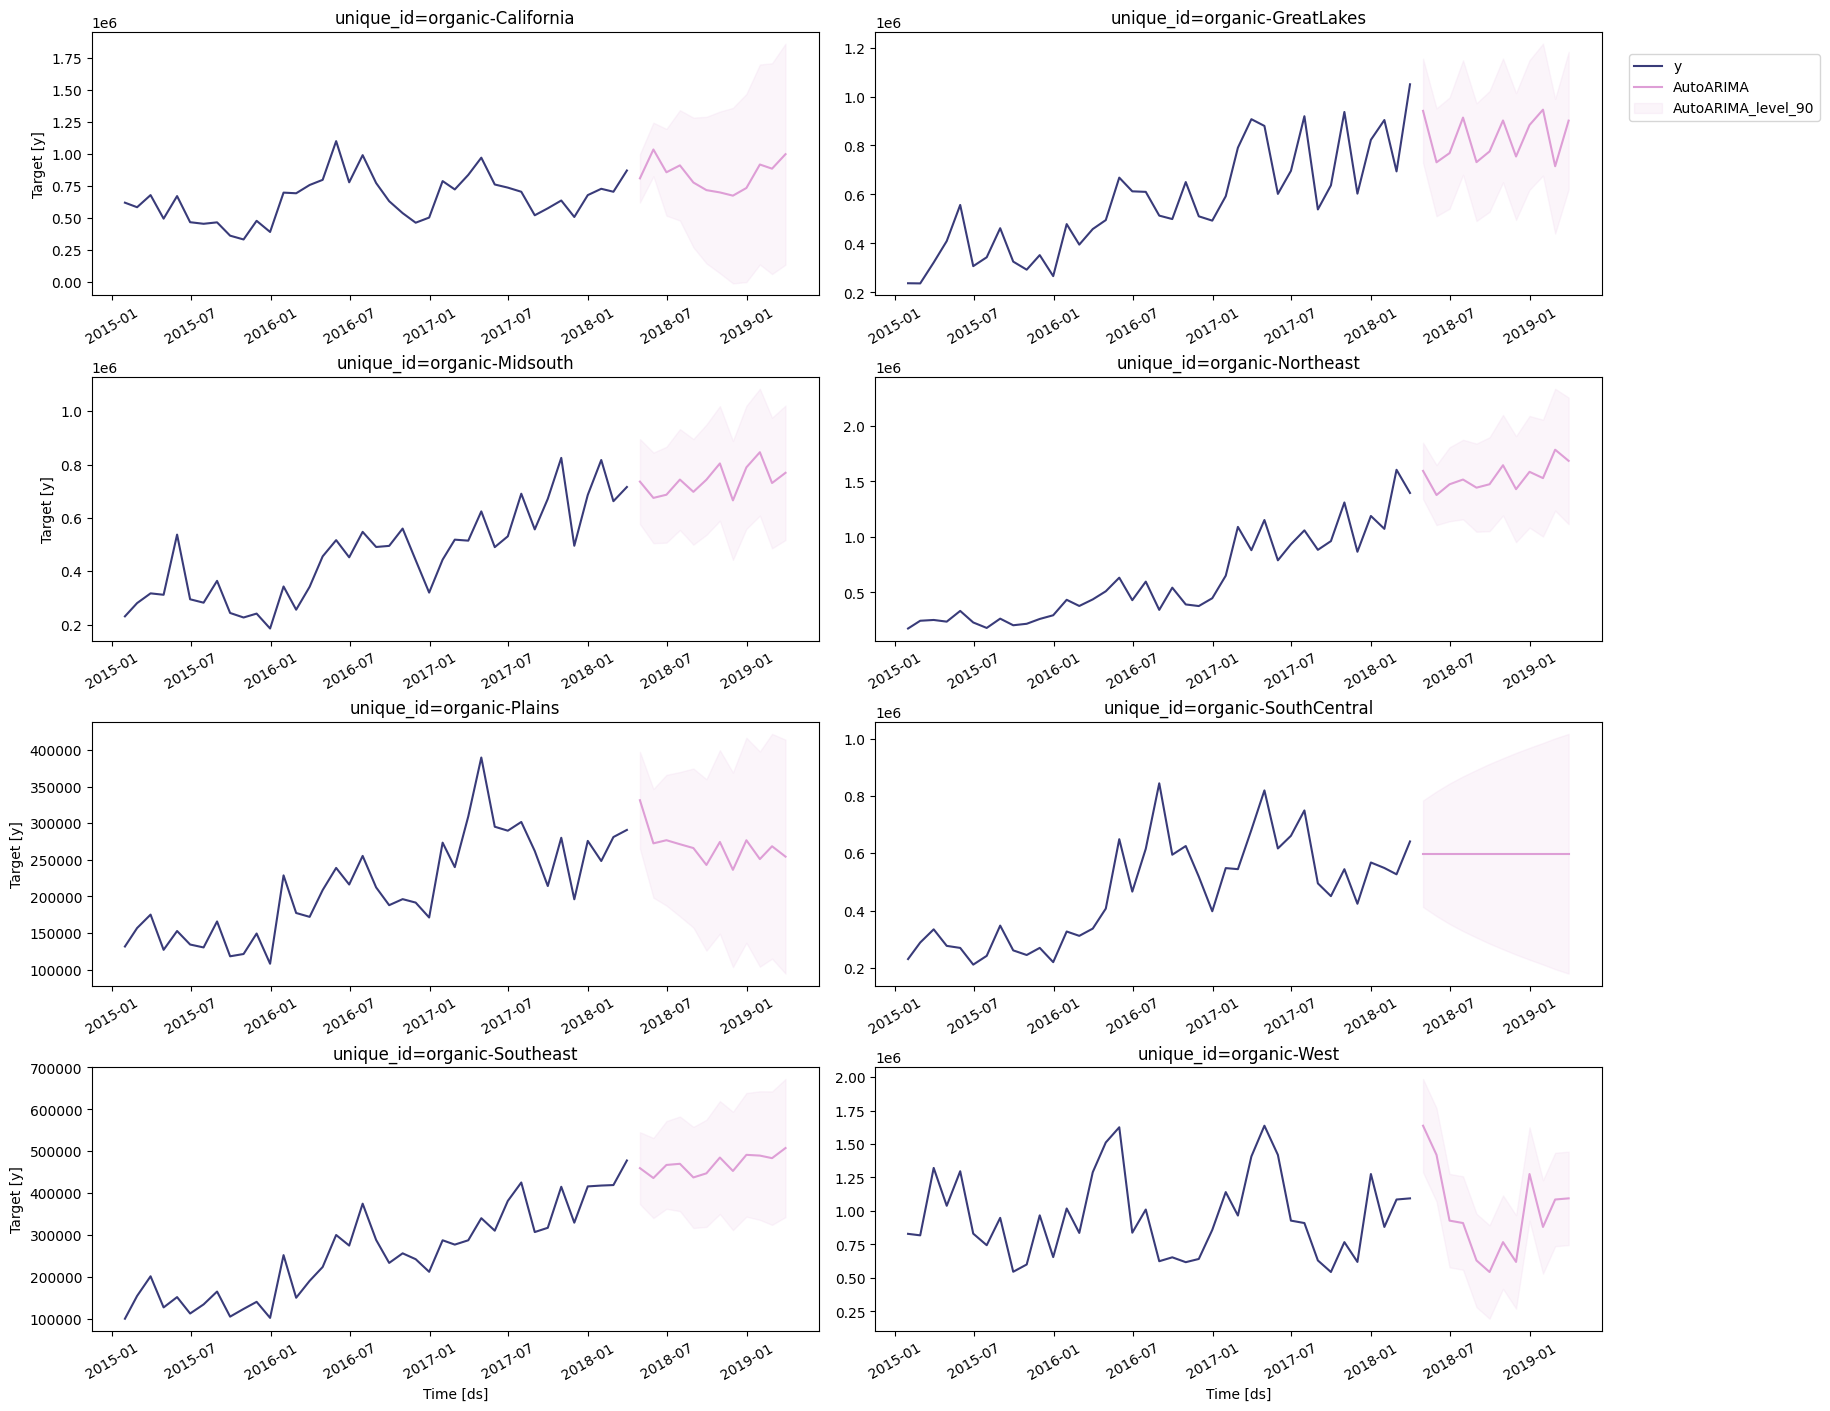

In [256]:
organic_pred.plot(organic_monthly_df, forecast_organic_df, level=[90])

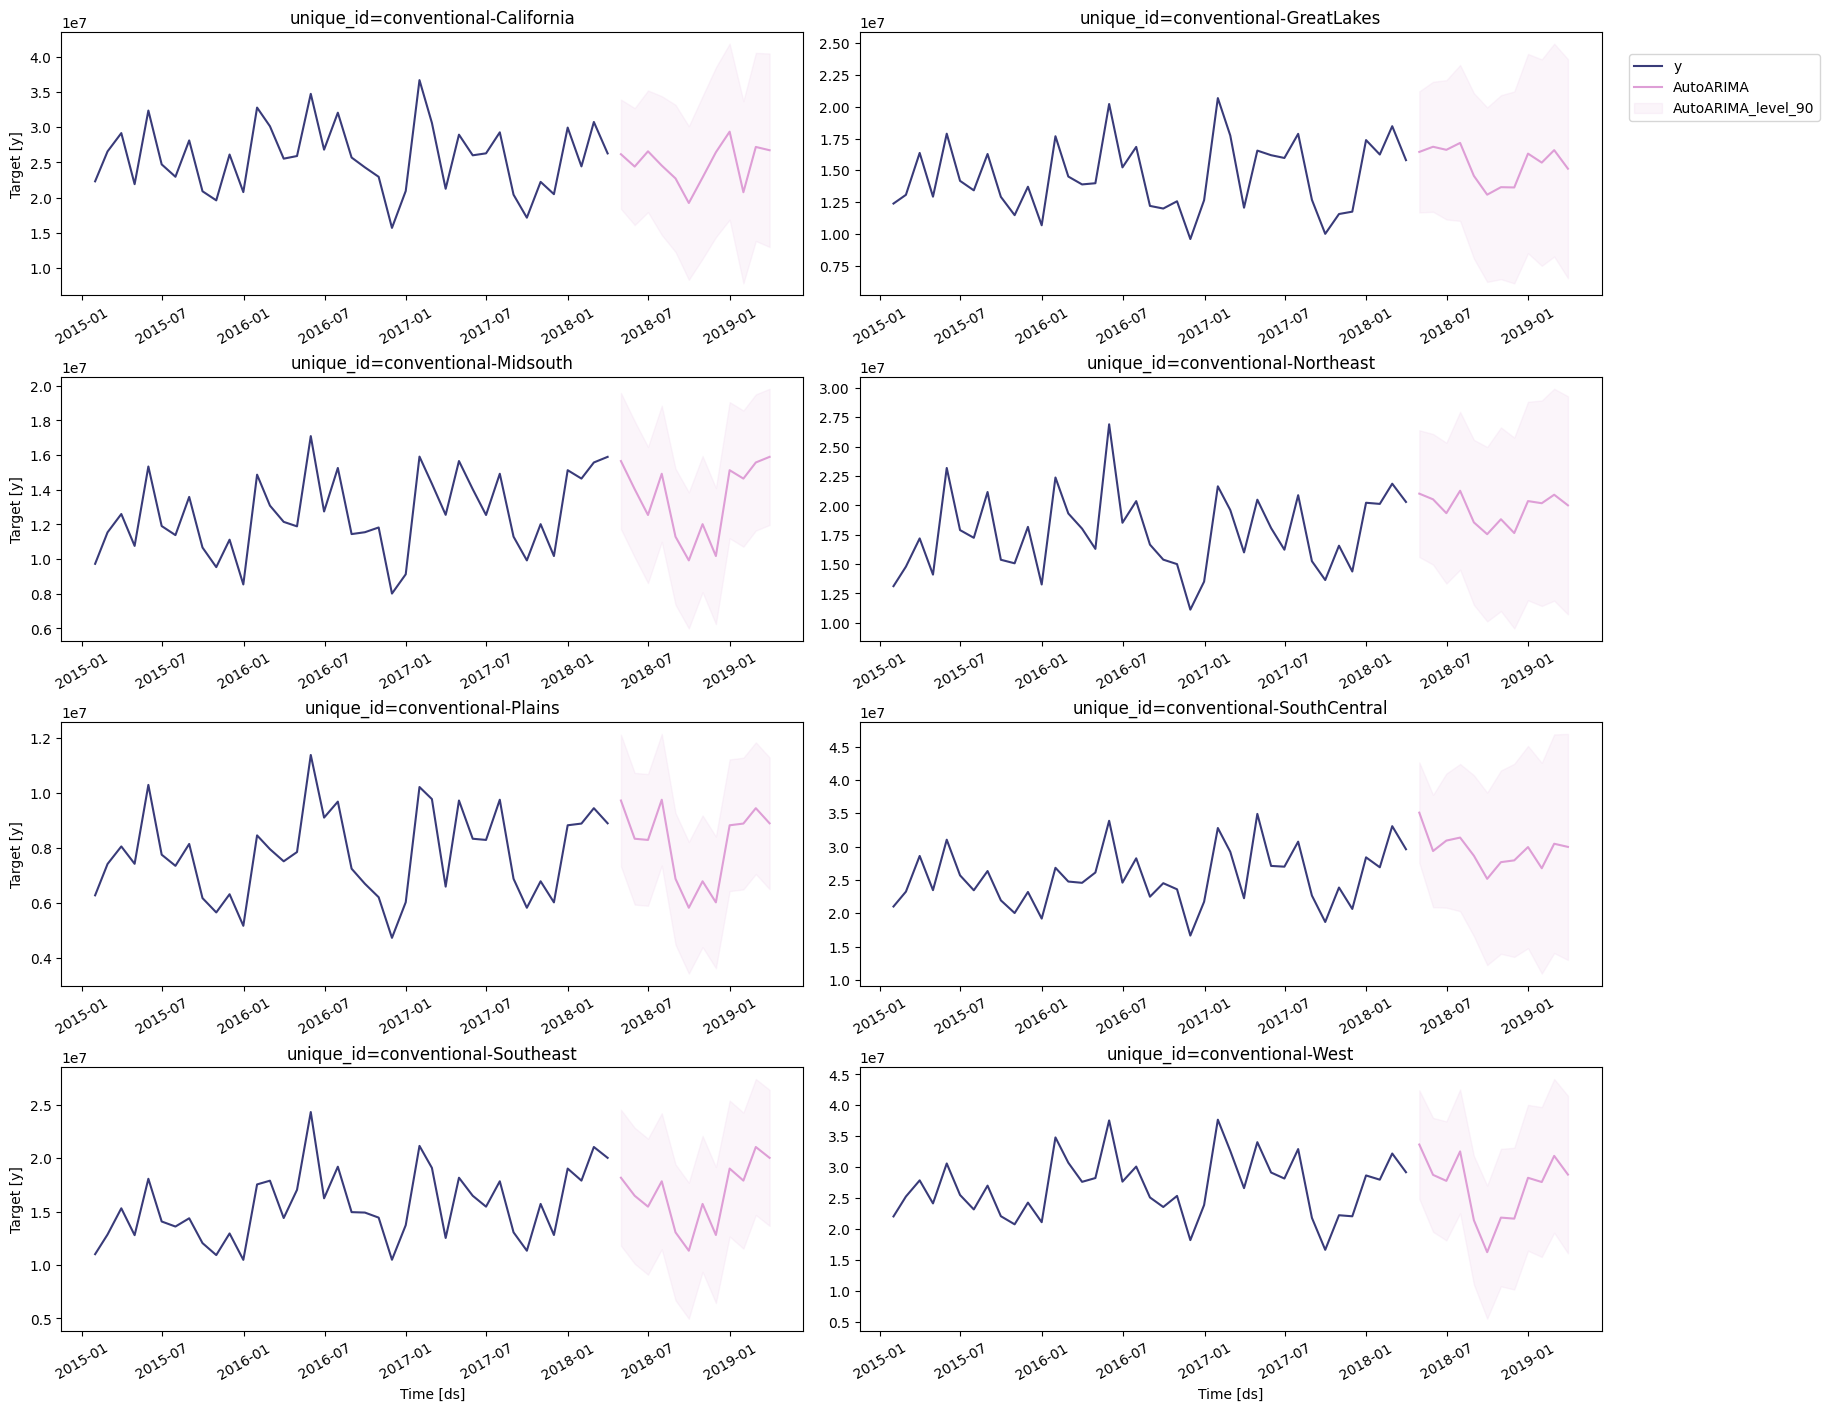

In [110]:
conventional_pred.plot(conventional_monthly_df, forecast_conventional_df, level=[90])

In [271]:
# Filtrar los datos de entrenamiento y prueba para organic_monthly
organic_train = organic_monthly_df[organic_monthly_df['ds'] < '2017-07-01']
organic_test = organic_monthly_df[(organic_monthly_df['ds'] >= '2017-07-01')]

# Filtrar los datos de entrenamiento y prueba para conventional_monthly
conventional_train = conventional_monthly_df[conventional_monthly_df['ds'] < '2017-07-01']
conventional_test = conventional_monthly_df[(conventional_monthly_df['ds'] >= '2017-07-01')]

organic_test.tail()

,ds,unique_id,y
307,2018-03-31,organic-Northeast,1395676.43
308,2018-03-31,organic-Plains,290752.18
309,2018-03-31,organic-SouthCentral,641430.22
310,2018-03-31,organic-Southeast,478031.80
311,2018-03-31,organic-West,1093855.59


In [272]:
sf = StatsForecast(
    models=[AutoARIMA(season_length = 12)],
    freq='M',
)

sf2 = StatsForecast(
    models=[AutoARIMA(season_length = 12)],
    freq='M',
)

organic_pred = sf.fit(organic_train)
conventional_pred = sf2.fit(conventional_train)

In [273]:
forecast_organic_df = organic_pred.predict(h=9, level=[90])
forecast_conventional_df = conventional_pred.predict(h=9, level=[90])

/home/andres/.pyenv/versions/3.12.1/lib/python3.12/site-packages/utilsforecast/processing.py:384: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
/home/andres/.pyenv/versions/3.12.1/lib/python3.12/site-packages/utilsforecast/processing.py:438: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
/home/andres/.pyenv/versions/3.12.1/lib/python3.12/site-packages/utilsforecast/processing.py:384: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
/home/andres/.pyenv/versions/3.12.1/lib/python3.12/site-packages/utilsforecast/processing.py:438: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  freq = pd.tseries.frequencies.to_offset(freq)


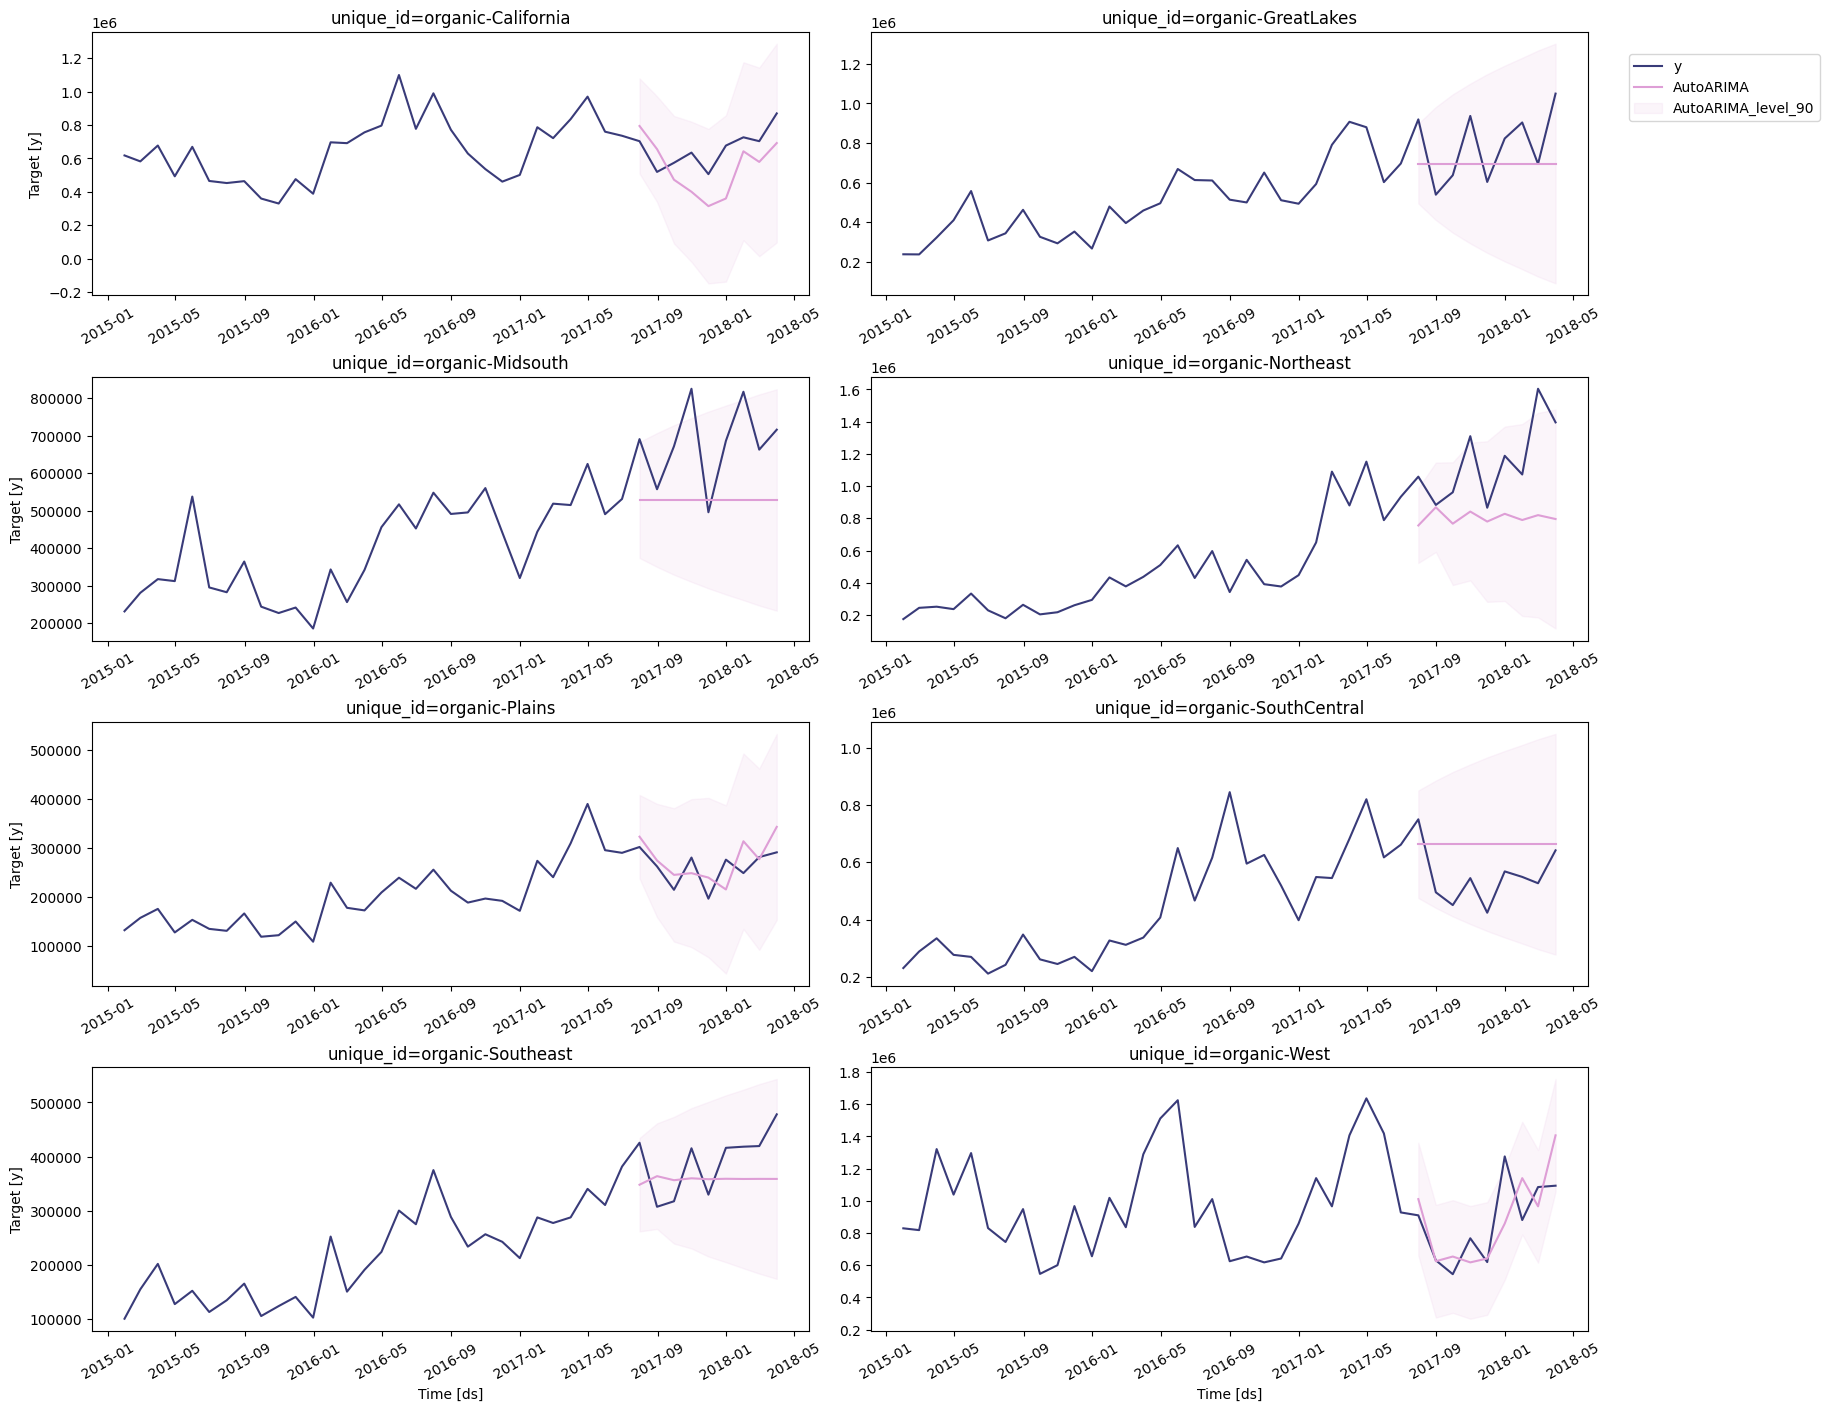

In [274]:
organic_pred.plot(organic_monthly_df, forecast_organic_df, level=[90])

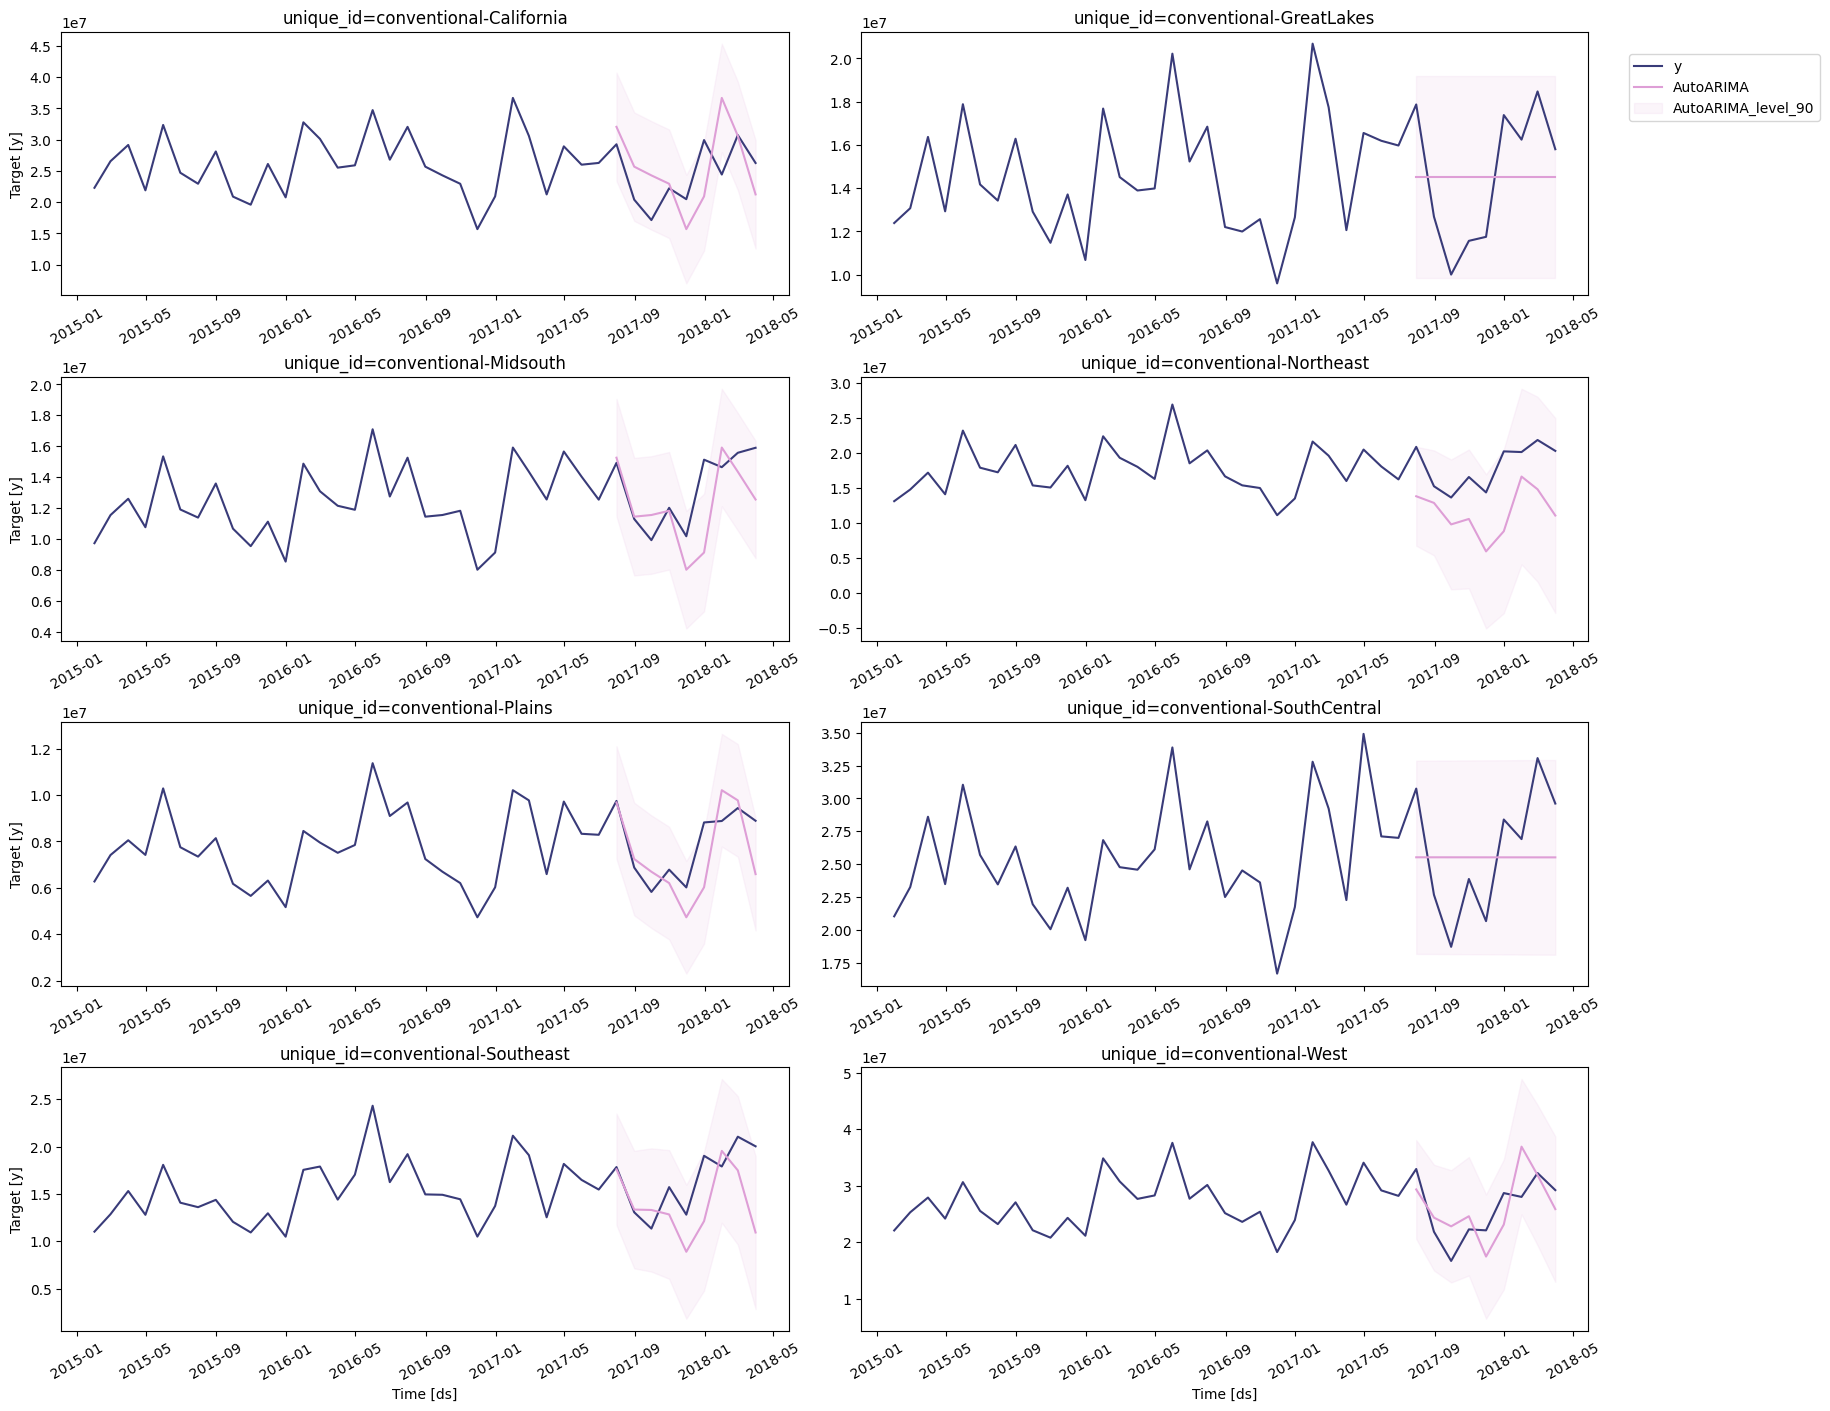

In [275]:
conventional_pred.plot(conventional_monthly_df, forecast_conventional_df, level=[90], engine="matplotlib")

In [115]:
forecast_organic_df


,unique_id,ds,AutoARIMA,AutoARIMA-lo-90,AutoARIMA-hi-90
0,organic-California,2018-01-31,8.221505e+05,6.221540e+05,1.022147e+06
1,organic-California,2018-02-28,7.399864e+05,5.163671e+05,9.636058e+05
2,organic-California,2018-03-31,8.341132e+05,4.736775e+05,1.194549e+06
3,organic-GreatLakes,2018-01-31,7.104685e+05,5.101869e+05,9.107501e+05
4,organic-GreatLakes,2018-02-28,8.866564e+05,6.786121e+05,1.094701e+06
5,organic-GreatLakes,2018-03-31,9.584128e+05,7.428851e+05,1.173941e+06
6,organic-Midsouth,2018-01-31,6.112136e+05,4.617778e+05,7.606495e+05
7,organic-Midsouth,2018-02-28,7.016171e+05,5.429773e+05,8.602569e+05
8,organic-Midsouth,2018-03-31,6.728643e+05,5.055260e+05,8.402026e+05
9,organic-Northeast,2018-01-31,1.001917e+06,7.372973e+05,1.266537e+06


In [242]:
crossvalidation_df = sf.cross_validation(
    df = organic_train,
    h = 1,
    step_size = 1,
    n_windows = 3
  )

In [243]:
crossvalidation2_df = sf2.cross_validation(
    df = conventional_train,
    h = 1,
    step_size = 1,
    n_windows = 3
  )

In [244]:
crossvalidation_df.head(10)

,unique_id,ds,cutoff,y,AutoARIMA
0,organic-California,2017-10-31,2017-09-30,634320.03,379005.352614
1,organic-California,2017-11-30,2017-10-31,505395.24,490823.747071
2,organic-California,2017-12-31,2017-11-30,676460.85,569302.712552
3,organic-GreatLakes,2017-10-31,2017-09-30,937043.95,659237.344319
4,organic-GreatLakes,2017-11-30,2017-10-31,603195.90,780290.605193
5,organic-GreatLakes,2017-12-31,2017-11-30,823037.31,708639.707090
6,organic-Midsouth,2017-10-31,2017-09-30,824882.74,632015.293891
7,organic-Midsouth,2017-11-30,2017-10-31,495496.72,747733.662018
8,organic-Midsouth,2017-12-31,2017-11-30,686012.75,613985.969497
9,organic-Northeast,2017-10-31,2017-09-30,1309942.19,923929.409370


In [35]:
pip install datasetsforecast

  Obtaining dependency information for datasetsforecast from https://files.pythonhosted.org/packages/95/f4/a1f034c068e29c7ca04660f064bf169a72c1353e75317c1965cff0758fa4/datasetsforecast-0.0.8-py3-none-any.whl.metadata
  Obtaining dependency information for aiohttp from https://files.pythonhosted.org/packages/bf/fe/1332409d845ca601893bbf2d76935e0b93d41686e5f333841c7d7a4a770d/aiohttp-3.10.10-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for xlrd>=1.0.0 from https://files.pythonhosted.org/packages/a6/0c/c2a72d51fe56e08a08acc85d13013558a2d793028ae7385448a6ccdfae64/xlrd-2.0.1-py2.py3-none-any.whl.metadata
  Obtaining dependency information for aiohappyeyeballs>=2.3.0 from https://files.pythonhosted.org/packages/f7/d8/120cd0fe3e8530df0539e71ba9683eade12cae103dd7543e50d15f737917/aiohappyeyeballs-2.4.3-py3-none-any.whl.metadata
  Obtaining dependency information for aiosignal>=1.1.2 from https://files.pythonhosted.org/packages/76/ac/a7305

In [245]:
from datasetsforecast.losses import rmse

In [246]:
rmse_organic = rmse(crossvalidation_df['y'], crossvalidation_df['AutoARIMA'])
rmse_conv = rmse(crossvalidation2_df['y'], crossvalidation2_df['AutoARIMA'])
print("RMSE using cross-validation: organic /", rmse_organic, " conventional /", rmse_conv)

RMSE using cross-validation: organic / 181492.96595662367  conventional / 4488894.470977204


In [247]:
from datasetsforecast.losses import mape, mae

In [248]:
mape_organic = mape(crossvalidation_df['y'], crossvalidation_df['AutoARIMA'])
mape_conv = mape(crossvalidation2_df['y'], crossvalidation2_df['AutoARIMA'])
print("MAPE using cross-validation: organic /", mape_organic, " conventional /", mape_conv)

MAPE using cross-validation: organic / 22.003075257753576  conventional / 21.306384476288308


In [249]:
mae_organic = mae(crossvalidation_df['y'], crossvalidation_df['AutoARIMA'])
mae_conv = mae(crossvalidation2_df['y'], crossvalidation2_df['AutoARIMA'])
print("MAE using cross-validation: organic /", mae_organic, " conventional /", mae_conv)

MAE using cross-validation: organic / 143737.64594621057  conventional / 3741961.570018193


### OK, Ya hemos visto unos errores al hacer predicciones de series individuales type-GreaterRegion:

##### MAPE: Error de Porcentaje medio absoluto de un 20.39%

##### MAE: Error absoluto medio de 142812 unidades

Vamos ahora a hacer predicción agregada total, para eso tomaremos solo TotalUS


In [277]:
nuevo_avocado_df = imputar_fechas()
avocado_total = nuevo_avocado_df[nuevo_avocado_df['region_type'] == 'TotalUS']
avocado_total = avocado_total.sort_values(by=['Date', 'region']).reset_index(drop=True)
avocado_total['Date'] = pd.to_datetime(avocado_total['Date'])
avocado_total

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,region_type
0,51.0,2015-01-04,0.95,31324277.73,12357161.34,13624083.05,844093.32,4498940.02,3585321.58,894945.63,18672.81,conventional,2015.0,TotalUS,TotalUS
1,51.0,2015-01-04,1.46,612910.15,233286.13,216611.20,4370.99,158641.83,115068.71,43573.12,0.00,organic,2015.0,TotalUS,TotalUS
2,50.0,2015-01-11,1.42,669528.88,270966.74,260971.60,3830.42,133760.12,106844.49,26915.63,0.00,organic,2015.0,TotalUS,TotalUS
3,50.0,2015-01-11,1.01,29063542.75,11544810.53,12134773.38,866574.66,4517384.18,3783261.16,718333.87,15789.15,conventional,2015.0,TotalUS,TotalUS
4,49.0,2015-01-18,1.42,713120.00,254319.58,311811.01,4020.85,142968.56,101850.23,41118.33,0.00,organic,2015.0,TotalUS,TotalUS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,2.0,2018-03-11,1.09,40449603.12,14089091.05,10758039.45,707578.82,14894893.80,11392828.89,3229556.62,272508.29,conventional,2018.0,TotalUS,TotalUS
334,1.0,2018-03-18,1.54,1675804.22,170801.85,444949.69,1045.38,1058651.50,837351.85,221129.46,170.19,organic,2018.0,TotalUS,TotalUS
335,1.0,2018-03-18,1.05,41386314.12,13707389.51,11061051.69,645380.85,15972492.07,11712807.19,3988101.74,271583.14,conventional,2018.0,TotalUS,TotalUS
336,0.0,2018-03-25,1.03,43409835.75,14130799.10,12125711.42,758801.12,16394524.11,12540327.19,3544729.39,309467.53,conventional,2018.0,TotalUS,TotalUS


In [457]:
# Crear DataFrame para tipo 'organic'
organic_total = avocado_total[avocado_total['type'] == 'organic'].copy()
organic_total.rename(columns={'Date': 'ds'}, inplace=True)
organic_total['y'] = organic_total['Total Volume']
organic_total['unique_id'] = organic_total['type'] + '-' + organic_total['region']


# Crear DataFrame para tipo 'conventional'
conventional_total = avocado_total[avocado_total['type'] == 'conventional'].copy()
conventional_total.rename(columns={'Date': 'ds'}, inplace=True)
conventional_total['y'] = conventional_total['Total Volume']
conventional_total['unique_id'] = conventional_total['type'] + '-' + conventional_total['region']

In [458]:
organic_subset_total = organic_total[['unique_id', 'ds', 'y']].copy()
conventional_subset_total = conventional_total[['unique_id','ds', 'y']].copy()

In [459]:
# Agrupar por mes y unique_id, y sumar 'y' para cada combinación
organic_monthlyT_df = organic_subset_total.groupby([pd.Grouper(key='ds', freq='M'), 'unique_id']).agg({'y': 'sum'}).reset_index()
conventional_monthlyT_df = conventional_subset_total.groupby([pd.Grouper(key='ds', freq='M'), 'unique_id']).agg({'y': 'sum'}).reset_index()

/tmp/ipykernel_27737/902319516.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  organic_monthlyT_df = organic_subset_total.groupby([pd.Grouper(key='ds', freq='M'), 'unique_id']).agg({'y': 'sum'}).reset_index()
/tmp/ipykernel_27737/902319516.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  conventional_monthlyT_df = conventional_subset_total.groupby([pd.Grouper(key='ds', freq='M'), 'unique_id']).agg({'y': 'sum'}).reset_index()


In [460]:
# Filtrar los datos de entrenamiento y prueba para organic_monthly
organic_trainT = organic_monthlyT_df[organic_monthlyT_df['ds'] < '2017-02-1']
organic_testT = organic_monthlyT_df[(organic_monthlyT_df['ds'] >= '2017-02-01')]

# Filtrar los datos de entrenamiento y prueba para conventional_monthly
conventional_trainT = conventional_monthlyT_df[conventional_monthlyT_df['ds'] < '2017-02-01']
conventional_testT = conventional_monthlyT_df[(conventional_monthlyT_df['ds'] >= '2017-02-01')]

organic_testT.tail()

,ds,unique_id,y
34,2017-11-30,organic-TotalUS,4038808.37
35,2017-12-31,organic-TotalUS,5909492.73
36,2018-01-31,organic-TotalUS,5614950.52
37,2018-02-28,organic-TotalUS,5976466.40
38,2018-03-31,organic-TotalUS,6534437.07


In [461]:
sf3 = StatsForecast(
    models=[AutoARIMA(season_length = 12)],
    freq='M',
)

sf4 = StatsForecast(
    models=[AutoARIMA(season_length = 12)],
    freq='M',
)

organic_predT = sf3.fit(organic_trainT)
conventional_predT = sf4.fit(conventional_trainT)

In [462]:
forecast_organicT_df = organic_predT.predict(h=14, level=[90])
forecast_conventionalT_df = conventional_predT.predict(h=14, level=[90])

/home/andres/.pyenv/versions/3.12.1/lib/python3.12/site-packages/utilsforecast/processing.py:384: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
/home/andres/.pyenv/versions/3.12.1/lib/python3.12/site-packages/utilsforecast/processing.py:438: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
/home/andres/.pyenv/versions/3.12.1/lib/python3.12/site-packages/utilsforecast/processing.py:384: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
/home/andres/.pyenv/versions/3.12.1/lib/python3.12/site-packages/utilsforecast/processing.py:438: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  freq = pd.tseries.frequencies.to_offset(freq)


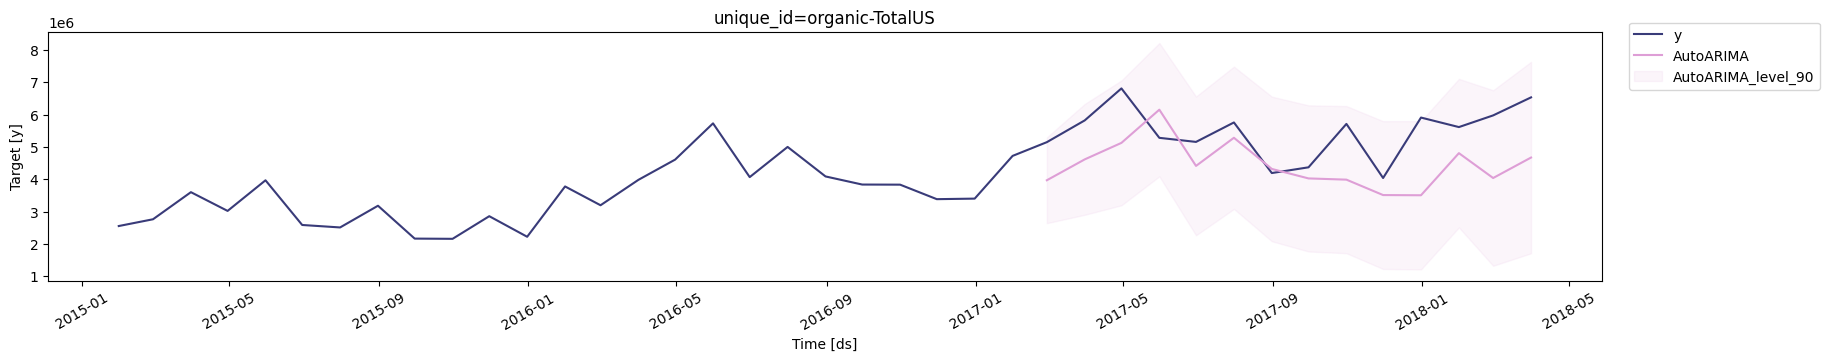

In [463]:
organic_predT.plot(organic_monthlyT_df, forecast_organicT_df, level=[90])

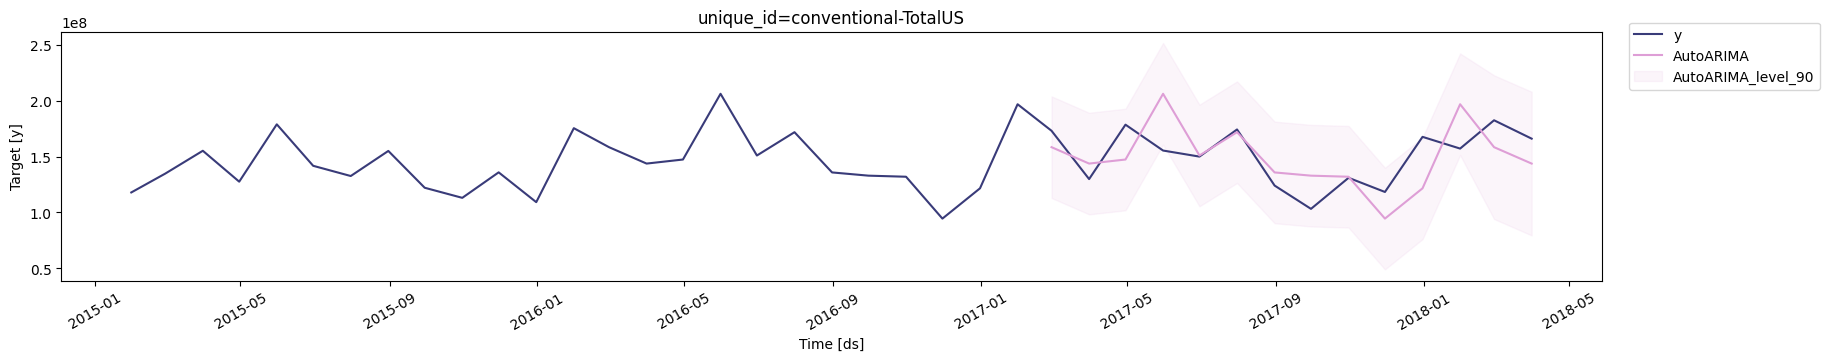

In [464]:
conventional_predT.plot(conventional_monthlyT_df, forecast_conventionalT_df, level=[90], engine="matplotlib")

### Cross-Validation
Es una técnica que permite hacer varias predicciones moviendo la ventana de predicción. En nuestro caso estamos haciendo predicciones mensuales (h=1 quiere decir predecir el siguiente mes). step_size=1 quiere decir moverse un mes hacia adelante para hacer la próxima predicción. n_windows=3 es el número de predicciones diferentes que haremos, en este caso 3.

Así con estos valores de h=1, step_size=1 y n_windows=3 lo que haremos es hacer primero una predicción (por ejemplo) de Octubre usando datos hasta Septiembre, luego hacemos una predicción de Noviembre incluyendo datos hasta Octubre, y finalmente predecimos Diciembre usando datos hasta Noviembre. Así podemos calcular errores y promediarlos, para obtener una métrica más ajustada. Ya que algunos meses pueden ser más fáciles o difíciles de predecir, así tenemos en cuenta posibles variaciones.

In [465]:
crossvalidation3_df = sf3.cross_validation(
    df = organic_trainT,
    h = 1,
    step_size = 1,
    n_windows = 3
  )

In [466]:
crossvalidation4_df = sf4.cross_validation(
    df = conventional_trainT,
    h = 1,
    step_size = 1,
    n_windows = 3
  )

In [467]:
from datasetsforecast.losses import rmse

In [468]:
rmse_organict = rmse(crossvalidation3_df['y'], crossvalidation3_df['AutoARIMA'])
rmse_convt = rmse(crossvalidation4_df['y'], crossvalidation4_df['AutoARIMA'])
print("RMSE using cross-validation: organic /", rmse_organict, " conventional /", rmse_convt)

RMSE using cross-validation: organic / 821552.5957474347  conventional / 52826814.525932185


In [469]:
from datasetsforecast.losses import mape, mae

In [470]:
mape_organict = mape(crossvalidation3_df['y'], crossvalidation3_df['AutoARIMA'])
mape_convt = mape(crossvalidation4_df['y'], crossvalidation4_df['AutoARIMA'])
print("MAPE using cross-validation: organic /", mape_organict, " conventional /", mape_convt)

MAPE using cross-validation: organic / 16.015564687075347  conventional / 33.07487046167303


In [452]:
mae_organict = mae(crossvalidation3_df['y'], crossvalidation3_df['AutoARIMA'])
mae_convt = mae(crossvalidation4_df['y'], crossvalidation4_df['AutoARIMA'])
print("MAE using cross-validation: organic /", mae_organict, " conventional /", mae_convt)

MAE using cross-validation: organic / 668110.075243116  conventional / 45000249.87784956


In [453]:
data = {
    "MAPE: Error Absoluto Porcentual Medio": [
        "Orgánico por regiones", 
        "Convencional por regiones", 
        "Orgánico Total US", 
        "Convencional US"
    ],
    "Valor %": [
        round(mape_organic, 2), 
        round(mape_conv, 2), 
        round(mape_organict, 2), 
        round(mape_convt, 2)
    ]
}

# Crear la tabla en un DataFrame
df = pd.DataFrame(data)

# Imprimir el DataFrame
print(df)

  MAPE: Error Absoluto Porcentual Medio  Valor %
0                 Orgánico por regiones    22.00
1             Convencional por regiones    21.31
2                     Orgánico Total US    16.02
3                       Convencional US    33.07


In [471]:
organic_subset_totalE = organic_total[['unique_id', 'ds', 'y', 'AveragePrice']].copy()
conventional_subset_totalE = conventional_total[['unique_id','ds', 'y', 'AveragePrice']].copy()

In [472]:
organic_monthlyTE_df = organic_subset_totalE.groupby([pd.Grouper(key='ds', freq='M'), 'unique_id']).agg({'y': 'sum', 'AveragePrice': 'sum'}).reset_index()
conventional_monthlyTE_df = conventional_subset_totalE.groupby([pd.Grouper(key='ds', freq='M'), 'unique_id']).agg({'y': 'sum', 'AveragePrice': 'sum'}).reset_index()

/tmp/ipykernel_27737/332787655.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  organic_monthlyTE_df = organic_subset_totalE.groupby([pd.Grouper(key='ds', freq='M'), 'unique_id']).agg({'y': 'sum', 'AveragePrice': 'sum'}).reset_index()
/tmp/ipykernel_27737/332787655.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  conventional_monthlyTE_df = conventional_subset_totalE.groupby([pd.Grouper(key='ds', freq='M'), 'unique_id']).agg({'y': 'sum', 'AveragePrice': 'sum'}).reset_index()


In [473]:
# Filtrar los datos de entrenamiento y prueba para organic_monthly
organic_trainTE = organic_monthlyTE_df[organic_monthlyT_df['ds'] < '2017-02-01']
organic_testTE = organic_monthlyTE_df[(organic_monthlyT_df['ds'] >= '2017-02-01')]
organic_testTE = organic_testTE.drop(columns=['y'])

# Filtrar los datos de entrenamiento y prueba para conventional_monthly
conventional_trainTE = conventional_monthlyTE_df[conventional_monthlyT_df['ds'] < '2017-02-01']
conventional_testTE = conventional_monthlyTE_df[(conventional_monthlyT_df['ds'] >= '2017-02-01')]
conventional_testTE = conventional_testTE.drop(columns=['y'])

organic_testTE.tail()

,ds,unique_id,AveragePrice
34,2017-11-30,organic-TotalUS,7.12
35,2017-12-31,organic-TotalUS,7.89
36,2018-01-31,organic-TotalUS,6.34
37,2018-02-28,organic-TotalUS,6.18
38,2018-03-31,organic-TotalUS,6.13


In [474]:
sf5 = StatsForecast(
    models=[AutoARIMA(season_length = 12)],
    freq='M',
)

sf6 = StatsForecast(
    models=[AutoARIMA(season_length = 12)],
    freq='M',
)

#organic_predTE = sf5.fit(organic_trainTE)
#conventional_predTE = sf6.fit(conventional_trainTE)

In [475]:
#forecast_organicTE_df = organic_predTE.predict(h=9, level=[90], X_df=organic_testTE)
#forecast_conventionalTE_df = conventional_predTE.predict(h=9, level=[90], X_df=conventional_testTE)

forecast_organicTE_df = sf5.forecast(df=organic_trainTE ,h=14, level=[90], X_df=organic_testTE)
forecast_conventionalTE_df = sf6.forecast(df=conventional_trainTE, h=14, level=[90], X_df=conventional_testTE)

/home/andres/.pyenv/versions/3.12.1/lib/python3.12/site-packages/utilsforecast/processing.py:384: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
/home/andres/.pyenv/versions/3.12.1/lib/python3.12/site-packages/utilsforecast/processing.py:438: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
/home/andres/.pyenv/versions/3.12.1/lib/python3.12/site-packages/utilsforecast/processing.py:384: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
/home/andres/.pyenv/versions/3.12.1/lib/python3.12/site-packages/utilsforecast/processing.py:438: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  freq = pd.tseries.frequencies.to_offset(freq)


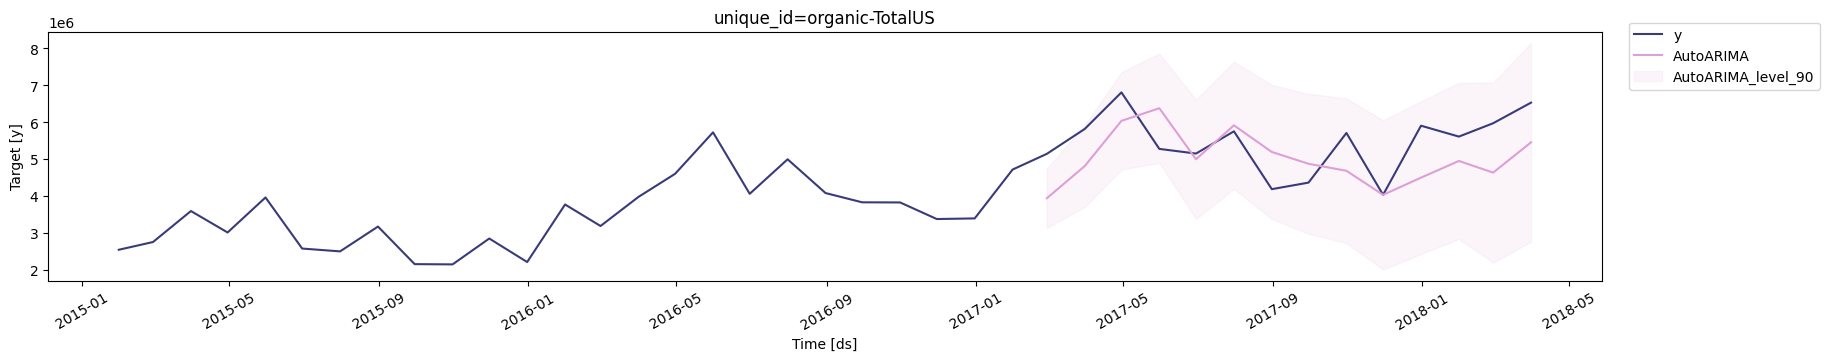

In [476]:
StatsForecast.plot(organic_monthlyTE_df, forecast_organicTE_df, level=[90])

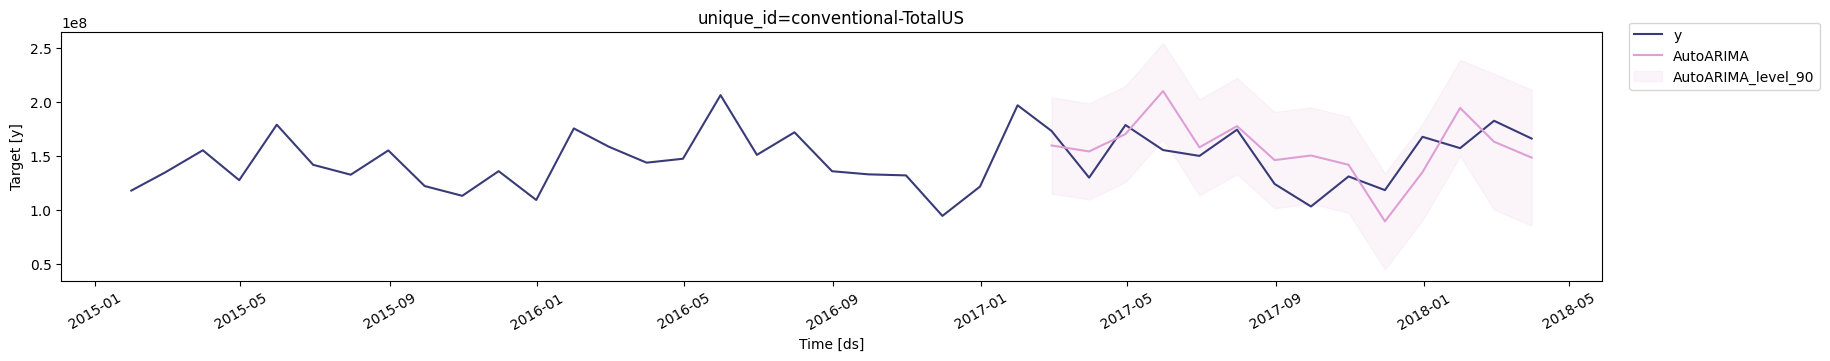

In [477]:
StatsForecast.plot(conventional_monthlyTE_df, forecast_conventionalTE_df, level=[90])

In [478]:
crossvalidation5_df = sf5.cross_validation(
    df = organic_trainTE,
    h = 1,
    step_size = 1,
    n_windows = 3
  )

In [479]:
crossvalidation6_df = sf6.cross_validation(
    df = conventional_trainTE,
    h = 1,
    step_size = 1,
    n_windows = 3
  )

In [480]:
organic_testTE2 = organic_monthlyTE_df[(organic_monthlyT_df['ds'] >= '2017-02-01')]
conventional_testTE2 = conventional_monthlyTE_df[(conventional_monthlyT_df['ds'] >= '2017-02-01')]
forecast_organicTE_df

,unique_id,ds,AutoARIMA,AutoARIMA-lo-90,AutoARIMA-hi-90
0,organic-TotalUS,2017-02-28,3.947039e+06,3.143973e+06,4.750106e+06
1,organic-TotalUS,2017-03-31,4.817408e+06,3.712700e+06,5.922116e+06
2,organic-TotalUS,2017-04-30,6.040779e+06,4.724014e+06,7.357545e+06
3,organic-TotalUS,2017-05-31,6.382451e+06,4.901890e+06,7.863013e+06
4,organic-TotalUS,2017-06-30,5.001325e+06,3.388591e+06,6.614059e+06
5,organic-TotalUS,2017-07-31,5.920147e+06,4.198018e+06,7.642276e+06
6,organic-TotalUS,2017-08-31,5.199076e+06,3.384894e+06,7.013259e+06
7,organic-TotalUS,2017-09-30,4.879460e+06,2.986914e+06,6.772006e+06
8,organic-TotalUS,2017-10-31,4.689382e+06,2.729554e+06,6.649209e+06
9,organic-TotalUS,2017-11-30,4.038379e+06,2.020409e+06,6.056348e+06


In [481]:
organic_testTE2

,ds,unique_id,y,AveragePrice
25,2017-02-28,organic-TotalUS,5147937.27,5.29
26,2017-03-31,organic-TotalUS,5822141.14,5.33
27,2017-04-30,organic-TotalUS,6811571.48,7.63
28,2017-05-31,organic-TotalUS,5282017.51,6.52
29,2017-06-30,organic-TotalUS,5155972.85,6.68
30,2017-07-31,organic-TotalUS,5757871.57,8.77
31,2017-08-31,organic-TotalUS,4192210.48,7.76
32,2017-09-30,organic-TotalUS,4369505.27,8.03
33,2017-10-31,organic-TotalUS,5713246.43,9.36
34,2017-11-30,organic-TotalUS,4038808.37,7.12


In [482]:
mape_organict = mape(organic_testTE2['y'], forecast_organicTE_df['AutoARIMA'])
mape_convt = mape(crossvalidation4_df['y'], crossvalidation4_df['AutoARIMA'])
print("MAPE using cross-validation: organic /", mape_organict, " conventional /", mape_convt)

MAPE using cross-validation: organic / 0.0  conventional / 33.07487046167303


In [427]:
pip install scikit-learn


  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/c6/29/044048c5e911373827c0e1d3051321b9183b2a4f8d4e2f11c08fcff83f13/scikit_learn-1.5.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached scikit_learn-1.5.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (13 kB)
  Obtaining dependency information for joblib>=1.2.0 from https://files.pythonhosted.org/packages/91/29/df4b9b42f2be0b623cbd5e2140cafcaa2bef0759a00b7b70104dcfe2fb51/joblib-1.4.2-py3-none-any.whl.metadata
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
Using cached scikit_learn-1.5.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.9 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)

[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [483]:
from sklearn.metrics import mean_absolute_percentage_error

In [484]:
mape_organict = mean_absolute_percentage_error(organic_testTE2['y'], forecast_organicTE_df['AutoARIMA'])
mape_convt = mean_absolute_percentage_error(conventional_testTE2['y'], forecast_conventionalTE_df['AutoARIMA'])

In [485]:
print("MAPE using cross-validation: organic /", mape_organict, " conventional /", mape_convt)

MAPE using cross-validation: organic / 0.14749612458426972  conventional / 0.1668800382898834
